In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pd.set_option('mode.chained_assignment',  None)

In [4]:
po = pd.read_csv('/content/drive/MyDrive/Raw데이터(kaggle)/US Police Shootings from 2015- Sep 2022/US Police shootings in from 2015-22.csv')

In [5]:
po.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'longitude', 'latitude', 'is_geocoding_exact'],
      dtype='object')

In [6]:
po.head(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,2,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,4,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,5,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [8]:
po.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7729 entries, 0 to 7728
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7729 non-null   int64  
 1   name                     7312 non-null   object 
 2   date                     7729 non-null   object 
 3   manner_of_death          7729 non-null   object 
 4   armed                    7520 non-null   object 
 5   age                      7247 non-null   float64
 6   gender                   7709 non-null   object 
 7   race                     6269 non-null   object 
 8   city                     7729 non-null   object 
 9   state                    7729 non-null   object 
 10  signs_of_mental_illness  7729 non-null   bool   
 11  threat_level             7729 non-null   object 
 12  flee                     6854 non-null   object 
 13  body_camera              7729 non-null   bool   
 14  longitude               

In [9]:
po.isnull().sum()

id                            0
name                        417
date                          0
manner_of_death               0
armed                       209
age                         482
gender                       20
race                       1460
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        875
body_camera                   0
longitude                   837
latitude                    837
is_geocoding_exact            0
dtype: int64

In [15]:
po['manner_of_death'].unique()

array(['shot', 'shot and Tasered'], dtype=object)

In [24]:
po['age_bin'] = pd.cut(po['age'],bins = [0,19,29,39,49,59,69,100],labels =['0-19','20-29','30-39','40-49','50-59','60-69','70+'] )

In [25]:
po.head(3)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,age_bin
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True,50-59
1,2,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True,40-49
2,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True,20-29


In [66]:
po['city'].value_counts().head(10).index

Index(['Los Angeles', 'Phoenix', 'Houston', 'San Antonio', 'Las Vegas',
       'Albuquerque', 'Chicago', 'Columbus', 'Denver', 'Tucson'],
      dtype='object')

In [55]:
po_age = po.groupby(['city'])['age_bin'].value_counts().reset_index()

In [56]:
po_age

,city,level_1,age_bin
0,300 block of State Line Road,30-39,1
1,300 block of State Line Road,0-19,0
2,300 block of State Line Road,20-29,0
3,300 block of State Line Road,40-49,0
4,300 block of State Line Road,50-59,0
...,...,...,...
22031,Zion,20-29,0
22032,Zion,40-49,0
22033,Zion,50-59,0
22034,Zion,60-69,0


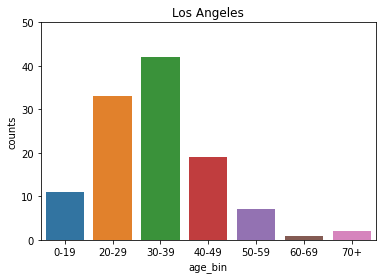

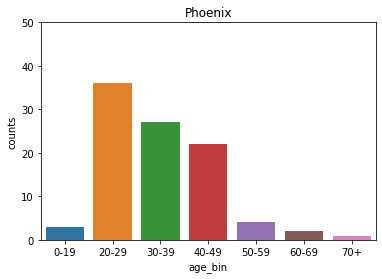

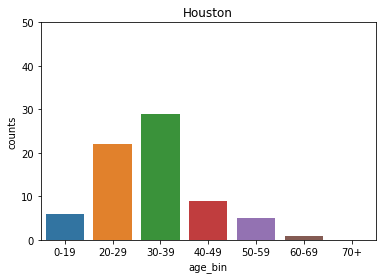

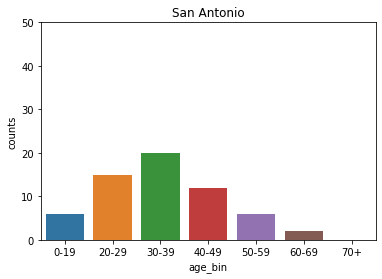

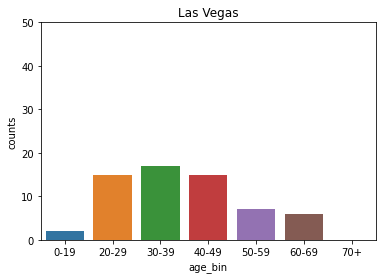

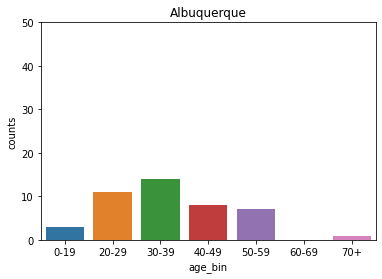

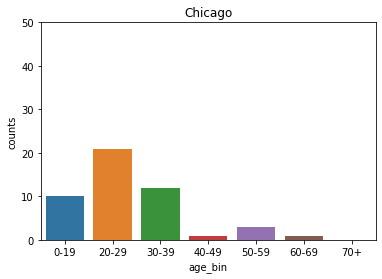

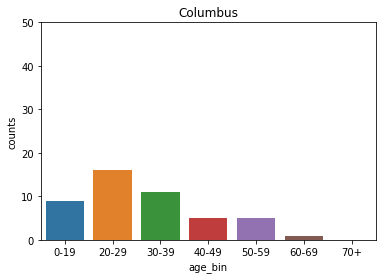

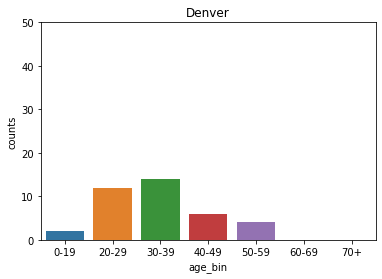

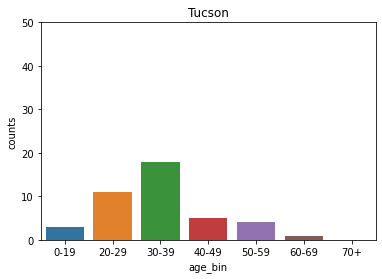

In [93]:
for i in po['city'].value_counts().head(10).index :    
    sns.barplot(data = po_age[(po_age['city'] ==  i )], x = 'level_1', y = 'age_bin')
    plt.ylabel('counts')
    plt.xlabel('age_bin')
    plt.ylim([0,50])
    plt.title(i)
    plt.show()

In [ ]:
po_age[(po_age['city'] == 'Los Angeles') | (po_age['city'] == 'Phoenix')]

In [122]:
po['gender'].unique()

array(['M', 'F', nan], dtype=object)

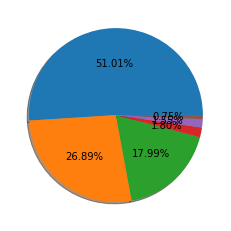

In [121]:
plt.pie(po['race'].value_counts(),shadow = True,autopct='%0.2f%%');

In [139]:
po['signs_of_mental_illness'] = po['signs_of_mental_illness'].map({True:1,False:0}).astype(int)

In [140]:
po['signs_of_mental_illness']

0       1
1       0
2       0
3       1
4       0
       ..
7724    0
7725    0
7726    0
7727    0
7728    0
Name: signs_of_mental_illness, Length: 7729, dtype: int64

In [136]:
po.isnull().sum()

id                            0
name                        417
date                          0
manner_of_death               0
armed                       209
age                         482
gender                       20
race                       1460
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        875
body_camera                   0
longitude                   837
latitude                    837
is_geocoding_exact            0
age_bin                     482
dtype: int64

In [147]:
len(po[po['signs_of_mental_illness']== 1])*100/len(po)

21.21878638892483

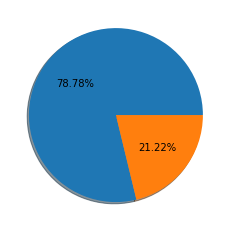

In [148]:
plt.pie(po['signs_of_mental_illness'].value_counts(),shadow = True,autopct='%0.2f%%');

In [149]:
po['flee'].unique()

array(['Not fleeing', 'Car', 'Foot', 'Other', nan], dtype=object)

In [150]:
po.groupby(['threat_level'])['age_bin'].value_counts()

threat_level       
attack        30-39    1448
              20-29    1195
              40-49     867
              50-59     548
              60-69     246
              0-19      209
              70+        77
other         30-39     749
              20-29     669
              40-49     455
              50-59     267
              0-19      141
              60-69      93
              70+        30
undetermined  20-29      82
              30-39      75
              40-49      47
              50-59      24
              0-19       11
              60-69      10
              70+         4
Name: age_bin, dtype: int64

In [ ]:
sns.lineplot(data = po['date'].value_counts().reset_index().sort_values(by = 'index'), x = 'index', y = 'date')
plt.xticks(po['date'].value_counts().reset_index().sort_values(by = 'index')['index'],rotation = 45)

In [185]:
import plotly.express as px

In [171]:
  
fig = px.choropleth(locations=po['state'], locationmode="USA-states", color=sales['sales'], scope="usa"
, color_continuous_scale='peach', title='주 별 총 판매금액')

fig.show()

TypeError: ignored

In [ ]:
po_po = po.groupby([state]).sum().sort_values('')

In [186]:
po.groupby([state]).sum()

NameError: ignored

In [202]:
po['count'] = 1

In [203]:
po.head(1)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,age_bin,count
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,1,attack,Not fleeing,False,-123.122,47.247,True,50-59,1


In [196]:
pd.DataFrame(po['date'].value_counts())

,date
2018-01-06,9
2021-11-28,9
2018-02-01,9
2018-04-01,9
2019-01-28,9
...,...
2015-06-28,1
2021-07-05,1
2015-06-29,1
2021-07-02,1


In [208]:
po1 = po.groupby(['state']).sum().reset_index()
po1

,state,id,age,signs_of_mental_illness,body_camera,longitude,latitude,is_geocoding_exact,count
0,AK,208669,1768.0,7,4,-6428.459,2686.534,52,53
1,AL,552923,5586.0,31,20,-10965.430,4169.039,146,146
2,AR,445602,4089.0,16,7,-8683.795,3300.017,109,109
3,AZ,1319188,12075.0,62,52,-34344.906,10274.319,350,351
4,CA,4040485,35810.0,229,208,-120875.715,36002.568,1114,1114
5,CO,1115838,8833.0,34,28,-26276.783,9875.396,277,279
6,CT,76563,813.0,6,5,-1529.851,872.193,22,22
7,DC,95704,799.0,3,10,-1770.833,894.542,24,24
8,DE,56833,568.0,4,3,-1207.550,628.989,17,17
9,FL,1927164,17674.0,129,51,-36957.585,12766.921,494,494


In [210]:

fig = px.choropleth(locations=po1['state'], locationmode="USA-states", color=po1['is_geocoding_exact'], scope="usa"
, color_continuous_scale='peach', title='주 별 총 판매금액')

fig.show()